In [1]:
import numpy as np
import matplotlib.pylab as plt
plt.rcParams["font.size"]=18

In [2]:
source_x = 25
source_y = 40

## Tracking data-1

In [3]:
x = np.array([20,10,0,25,50,20]) #mm
y = np.array([0,40,70,60,30,0])   #mm
#A = np.array([1,40,5,1,1,1])

n_interp = 100
n_points = len(x)-1
xnew = np.zeros(n_points*n_interp)
ynew = np.zeros(n_points*n_interp)
Anew = np.zeros(n_points*n_interp)
for i in range(n_points):
    ii = i+1
    x_err = np.random.rand(n_interp)*3 # 3mm deviation
    y_err = np.random.rand(n_interp)*3 # 3mm deviation
    A_err = np.random.rand(n_interp)*5 # 5mA deviation
    x_interp = np.linspace(x[i],x[ii],n_interp)
    y_interp = np.linspace(y[i],y[ii],n_interp)
    A=20000./(np.square(x_interp-source_x)+np.square(y_interp-source_y))
    #A_interp = np.logspace(np.log10(A[i]),np.log10(A[ii]),n_interp)+A_err
    xnew[i*n_interp:ii*n_interp] = x_interp+x_err
    ynew[i*n_interp:ii*n_interp] = y_interp+y_err
    #Anew[i*n_interp:ii*n_interp] = A_interp
    Anew[i*n_interp:ii*n_interp] = A+A_err
#print xnew
#print ynew
#print Anew
np.savetxt("data.txt",np.array([xnew,ynew,Anew]).T)

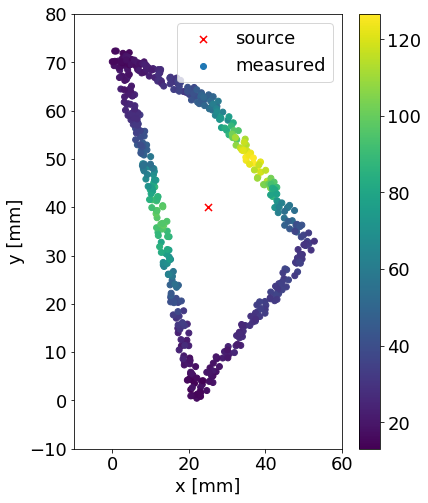

In [4]:
plt.figure(figsize=(6,8))
plt.scatter([source_x],[source_y],marker="x",s=50,color="r",label="source")
plt.scatter(xnew,ynew,c=Anew,label="measured")
plt.colorbar()
plt.xlim([-10,60])
plt.ylim([-10,80])
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
plt.legend(loc="best")
plt.show()

## Tracking data-2

In [5]:
#x = np.array([10,10,20,20,30,30,40,40,50,50,0,50,0,50,0,50,10]) #mm
#y = np.array([0,70,70,0,0,70,70,0,0,70,60,50,40,30,20,10,0])   #mm
x = np.array([10,10,20,20,30,30,40,40,50,50]) #mm
y = np.array([0,70,70,0,0,70,70,0,0,70])   #mm
#A=20000./(np.square(x-source_x)+np.square(y-source_y))

n_interp = 100
n_points = len(x)-1
xnew2 = np.zeros(n_points*n_interp)
ynew2 = np.zeros(n_points*n_interp)
Anew2 = np.zeros(n_points*n_interp)

for i in range(n_points):
    ii = i+1
    x_err = np.random.rand(n_interp)*3 # 3mm deviation
    y_err = np.random.rand(n_interp)*3 # 3mm deviation
    A_err = np.random.rand(n_interp)*5 # 5mA deviation
    x_interp = np.linspace(x[i],x[ii],n_interp)
    y_interp = np.linspace(y[i],y[ii],n_interp)
    A=20000./(np.square(x_interp-source_x)+np.square(y_interp-source_y))
    #A_interp = np.logspace(np.log10(A[i]),np.log10(A[ii]),n_interp)+A_err
    xnew2[i*n_interp:ii*n_interp] = x_interp+x_err
    ynew2[i*n_interp:ii*n_interp] = y_interp+y_err
    #Anew2[i*n_interp:ii*n_interp] = A_interp
    Anew2[i*n_interp:ii*n_interp] = A+A_err
#print xnew
#print ynew
#print Anew2
np.savetxt("data2.txt",np.array([xnew2,ynew2,Anew2]).T)

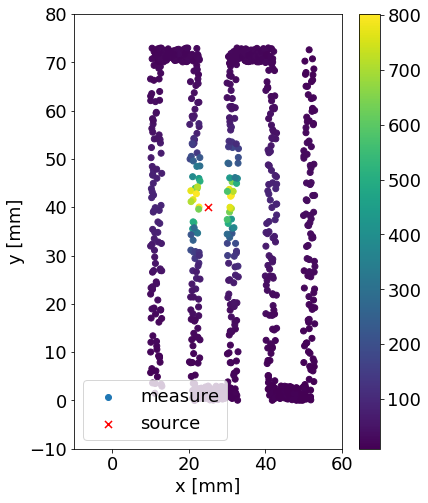

In [7]:
plt.figure(figsize=(6,8))
plt.scatter(xnew2,ynew2,c=Anew2,label="measure")
plt.colorbar()
plt.scatter([source_x],[source_y],marker="x",s=50,color="r",label="source")
plt.xlim([-10,60])
plt.ylim([-10,80])
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
plt.legend(loc="lower left")
plt.show()

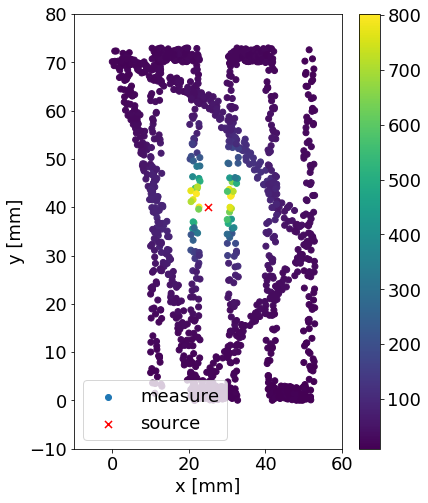

In [8]:
plt.figure(figsize=(6,8))
x = np.hstack((xnew,xnew2))
y = np.hstack((ynew,ynew2))
A = np.hstack((Anew,Anew2))
plt.scatter(x,y,c=A,label="measure")
plt.colorbar()
#plt.scatter(xnew2,ynew2,c=Anew2,label="measured")
#plt.colorbar()
plt.scatter([source_x],[source_y],marker="x",s=50,color="r",label="source")
plt.xlim([-10,60])
plt.ylim([-10,80])
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
plt.legend(loc="lower left")
plt.show()